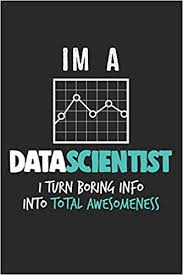

Welcome everyone to this notebook,this is my third notebook and in this I'm going to explain you about my own way of performing data analysis. The dataset I'm using is brasilian-houses-to-rent from kaggle.To say more about the process I can include that I'm going to use python language and libraries which i'm going to use are seaborn,numpy,pandas,matplotlib and scikit learn.

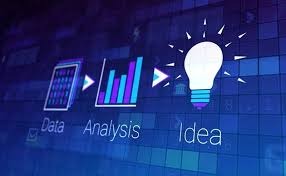

Data Analysis is all about finding some intersting insights in the data and we can find more insight by asking more questions and here I'm going to find some interesting insights in the data by asking the following questions:
* How total(price of house) is distributed?
* How rent amount is distributed?
* Significance of No of Rooms with the Rent
* What about pets?
* City and the rooms
* Does the city has to do any thing with rent?
* Does the people are looking for more bathrooms? (Silly Right)
* Does furnishing impact in the rent?
* Whats the relationship between parking spaces and the total rent?
* What about Fire Insurance?
* What about the impact of property tax in the rent?
Finally we will create a machine learning model to perform predictive analysis. I can assure that this is gonna be very interesting stuff...
Let's Start----->

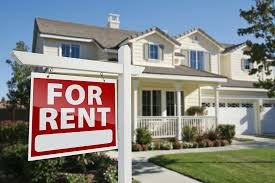

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
data = pd.read_csv('/kaggle/input/brasilian-houses-to-rent/houses_to_rent_v2.csv')

# Let's create our own helper functions
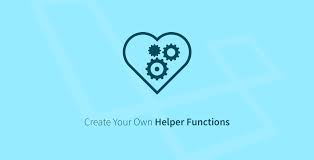

In [ ]:
def show_the_data(data):
    data.info()
    print("\n\nThe columns are {}".format(data.columns))
    print("\n\nActual Data\n",data.head(2))

In [ ]:
def handle_missing_values(col):
    print('Enter your choice\n1.Mean\t2.Median\t3.Mode')
    i=int(input())
    if i ==1:
        val =data[col].mean()
    elif i ==2:
        val = data[col].median()
    else:
        val = data[col].mode()[0]
    data[col] = data[col].fillna(val)

In [ ]:
def categorize(col):
    numerical,category=[],[]
    for i in col:
        if data[i].dtype ==object:
            category.append(i)
        else:
            numerical.append(i)
    print("The numerical features {}:".format(numerical))
    print("The categorical features {}:".format(category))
    return category,numerical

In [ ]:
def get_correlated(cor):
    correlated =set()
    for i in cor.columns:
        for j in cor.columns:
            if cor[i][j]>0.7 or cor[i][j]>-0.7 and i!=j:
                correlated.add(i)
                correlated.add(j)
    print("The Correlated columns: {}".format(list(correlated)))
    return correlated

In [ ]:
def cat_to_num(data_x,col):
    dummy = pd.get_dummies(data_x[col])
    del dummy[dummy.columns[-1]]#To avoid dummy variable trap
    data_x= pd.concat([data_x,dummy],axis =1)
    return data_x

In [ ]:
show_the_data(data)

In [ ]:
categorical,numerical =categorize(data.columns)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize =(8,8))
cor = data[numerical].corr()
sns.heatmap(cor,annot =True)

In [ ]:
correlated = get_correlated(cor)

In [ ]:
sns.pairplot(data[correlated])

In [ ]:
categorical

# How total is distributed?

In [ ]:
plt.figure(figsize =(10,10))
plt.subplot(2, 1, 1)
ax = sns.distplot(data['total (R$)'],kde =True)
ax.set_xlim(0,1200000)
ax.set_xticks(range(499,1200000,100000))
plt.subplot(2, 1, 2)
sns.boxplot(data['total (R$)'])

Nature of the data:<br/>
1.Right Skewed<br/>
2.Having potential outliers after 100000($)<br/>
3.Most of the values fall within the range 499 -100000

To see the total column more clearly see the plot given below this confirms our inference about the data

In [ ]:
plt.figure(figsize =(15,5))
ax = sns.rugplot(data['total (R$)'])
ax.set_xlim(0,1200000)
ax.set_xticks(range(499,1200000,100000))

# How rent amount is distributed

In [ ]:
plt.figure(figsize =(10,10))
plt.subplot(2, 1, 1)
ax = sns.distplot(data['rent amount (R$)'],kde =True)
plt.subplot(2, 1, 2)
sns.boxplot(data['rent amount (R$)'])

Mostly the range is in between 450 -10000<br/>
The Data is Right Skewed<br/>
Potential outliers are there which are more than 10000<br/>
The minimum rent is 450<br/>
The maximum rent is 45000<br/>


# Significance of No of Rooms with the Total Rent 

In [ ]:
sns.jointplot(y= data['rent amount (R$)'],x = data['rooms'],kind ='reg')

This is quite interesting the number of rooms does  have a great impact in the rent and it is also astonishing to see that the highest rent is given to 3 Roomed house
We can finally came to a conclusion that when the room is more than 2, the rent increases...

# What about pets?

In [ ]:
sns.countplot(data['animal'],hue = data['city'])

Sao Paulo are mostly accepting pets and mostly all the other cities are also accepting the pets and if you see the ratio of pet acceptance to non acceptance in all the cities its nearly 70:30

In [ ]:
sns.boxplot(data['rent amount (R$)'],y =data['animal'])

Mostly the house which allows pets are more costly compared to house that doesn't allows pet and there there is some relationship between animal acceptance and total rent

# City and the rooms

In [ ]:
col = pd.DataFrame(data['city'].unique())
col

In [ ]:
sns.catplot(x = 'city', y='rooms', data =data)

* Rio de Janeiro is the city which has the maxmimum no.of rooms in a house(upto 12 Rooms)
* Then comes São Paulo and Belo Horizonte which has upto 10 Roomed houses
* Campinas has upto 7 Roomed houses



# Does the city has to do any thing with rent?

In [ ]:
g = sns.FacetGrid(data, row = 'city')
g = g.map(plt.hist,'rent amount (R$)')

* São Paulo is highly opted for rental house the reason may be availability of more room and allowance of having pets as we seen in former analysis<br/>
* Campinas is lessly opted for rental house

# Does the people are looking for more bathrooms? (Silly Right)

In [ ]:
plt.subplot(2,1,1)
sns.distplot(data['bathroom'])
plt.subplot(2,1,2)
sns.countplot(data['bathroom'])

Nope!!!
* Mostly they are looking for only one or two bathrooms
* There are also quite a number of people who prefer (3-5) bathrooms
* There are very little amount people who looks for more than 5 bathrooms

In [ ]:
sns.catplot(x ='bathroom', y ='rent amount (R$)', data = data)

<b>Interesting fact is that the highest rent is given to the house with 7 bathrooms(What!!!!!)</b>

# Getting the intution about all the categorical features

In [ ]:
plt.figure(figsize=(15,15))
j =1
for i in categorical:
    plt.subplot(len(categorical),1,j)
    sns.countplot(data[i])
    j =j+1

# Does furnishing impact in the rent?

In [ ]:
sns.violinplot(x ='furniture', y ='rent amount (R$)', data = data,hue ='city')

Non-Furnished homes are more costly and they are highly opted!!!<br/>
Sao Paulo is the city with more non-furnitured houses

# Whats the relationship between parking spaces and the total rent?

In [ ]:
plt.figure(figsize =(6,6))
plt.subplot(2,1,1)
ax = sns.regplot(data['parking spaces'],data['rent amount (R$)'])
plt.subplot(2,1,2)
sns.distplot(data['parking spaces'],kde =False)

There is very less correlation between the parking spaces and the rent amount and mostly people are choosing houses with 0 to 2 parking spaces

# What about Fire Insurance?

In [ ]:
sns.violinplot(x ='city', y ='fire insurance (R$)', data = data,hue ='city')

SaoPaulo is the city which has more fire insurance amount followed by Porto Alegre, Belo Horizonte, Rio De Janerio and atlast Campinas

In [ ]:
ax = sns.regplot(data['fire insurance (R$)'],data['rent amount (R$)'])

There is very high correlation with Fire Insurance amount and the rent amount, if the fire insurance is more then the rent will also be more and vice versa

# What about the impact of property tax in the rent?

In [ ]:
sns.jointplot(y= data['rent amount (R$)'],x = data['property tax (R$)'],kind ='reg')

<b>!!!!!!!!!!!!!!!!!!!!LITERALLY NO IMPACT AT ALL!!!!!!!!!!!!!!!!!!!!!!!!!!</b>

In [ ]:
Wantedcolumns = ['fire insurance (R$)','parking spaces','rent amount (R$)','rooms','total (R$)','city','furniture','animal']

In [ ]:
data_x = data[Wantedcolumns]

In [ ]:
data_x.info()

In [ ]:
for i in data_x.columns:
    if data_x[i].dtype == object:
        print(i)
        data_x =cat_to_num(data_x,i)

In [ ]:
data_x.info()

In [ ]:
data_x.drop(['city','furniture','animal'],axis =1,inplace =True)

In [ ]:
data_x.info()

# Statistical Description of the data on which we are going to do perdictive analysis

In [ ]:
data_x.describe()

In [ ]:
y = data_x['rent amount (R$)']
x = data_x.drop(['rent amount (R$)'],axis =1)

In [ ]:
y.describe()

In [ ]:
x.info()

In [ ]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,y_train,y_test = tts(x,y,test_size =0.3)

In [ ]:
acc=[]

# Predictive analysis of Rent using
* Decision Tree Regression
* Random Forest Regression
* Linear Regression
* SVM Regression
* K Nearest Neighbour Regression
* Lasso Regression
* Ridge Regression

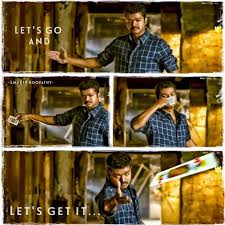

# Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor as regr
model =regr()
model.fit(X_train,y_train)
from sklearn.metrics import r2_score
print(r2_score(y_test,model.predict(X_test)))
acc.append(['DTR',r2_score(y_test,model.predict(X_test))])

# Visualising the Decision Tree

In [ ]:
!pip install pydotplus
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
plt.figure(figsize=(100,70))
Image(graph.create_png())

# Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor as regr
model =regr()
model.fit(X_train,y_train)
print(r2_score(y_test,model.predict(X_test)))
acc.append(['RFN',r2_score(y_test,model.predict(X_test))])

# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression as regr
model =regr()
model.fit(X_train,y_train)
print(r2_score(y_test,model.predict(X_test)))
acc.append(['LIR',r2_score(y_test,model.predict(X_test))])

# SVM Regression

In [ ]:
from sklearn.svm import SVR as regr
model =regr()
model.fit(X_train,y_train)
print(r2_score(y_test,model.predict(X_test)))
acc.append(['SVM',r2_score(y_test,model.predict(X_test))])

# K Nearest Neighbour Regression

In [ ]:
from sklearn.neighbors import KNeighborsRegressor as regr
model =regr()
model.fit(X_train,y_train)
print(r2_score(y_test,model.predict(X_test)))
acc.append(['KNNR',r2_score(y_test,model.predict(X_test))])

# Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso as regr
model =regr()
model.fit(X_train,y_train)
print(r2_score(y_test,model.predict(X_test)))
acc.append(['LaR',r2_score(y_test,model.predict(X_test))])

# Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge as regr
model =regr()
model.fit(X_train,y_train)
print(r2_score(y_test,model.predict(X_test)))
acc.append(['RiR',r2_score(y_test,model.predict(X_test))])

# Different Algorithms and their performance

In [ ]:
acc.sort(key = lambda y:y[1],reverse =True)

In [ ]:
acc

# As the Random Forest Regressor tops the list we will use it as our final model!!!!

In [ ]:
from sklearn.ensemble import RandomForestRegressor as regr
model =regr()
model.fit(X_train,y_train)

In [ ]:
ax1 = sns.distplot(y_test,hist=False,kde =True,color ="r",label ="Actual Value")
sns.distplot(model.predict(X_test),color ="b",hist = False,kde =True, label = "Preicted Value",ax =ax1)

**The overlapping of two curves tells about the higher accuracy of our model (99%)**

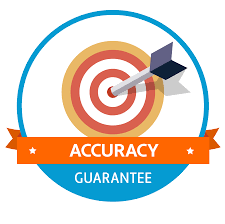

# I really convey my sincere gratitude to all who viewed my kernal and please upvote it, then only aspiring data scientist like me can achieve more...<br/>
# <center>If you have any query post it in comment section...<center>

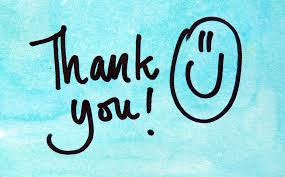